<br><br>
<font size='6'><b>Convolutional Neural Networks (CNN)
</b></font><br><br>

<table style="border-style: hidden; border-collapse: collapse;" width = "100%"> 
    <tr style="border-style: hidden; border-collapse: collapse;">
        <td width = 65% style="border-style: hidden; border-collapse: collapse;">

        </td>
        <td width = 35%>
        By Prof. Seungchul Lee<br>iSystems Design Lab<br>http://isystems.unist.ac.kr/<br>UNIST
        </td>
    </tr>
</table>

Table of Contents
<div id="toc"></div>

# 1. Convolution on Image

__Filter (or Kernel)__
- Modify or enhance an image by filtering
- Filter images to emphasize certain features or remove other features
- Filtering includes smoothing, sharpening and edge enhancement


__Convolution in 2D__

<img src="./image_files/conv_animation.gif" width = 350>

<img src="./image_files/conv_lena.png" width = 800>

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import imread, imresize
from scipy.signal import convolve2d
from six.moves import cPickle

% matplotlib inline

In [2]:
# Import image
input_image = cPickle.load(open('./image_files/lena.pkl', 'rb'))

# Edge filter
image_filter = np.array([[-1, 0, 1]
                        ,[-1, 0, 1]
                        ,[-1, 0, 1]])

# Compute feature
feature = convolve2d(input_image, image_filter, boundary='symm', mode='same')

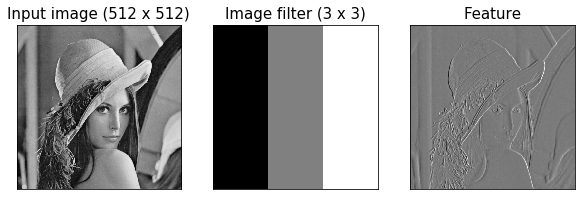

In [3]:
# Plot
fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(1, 3, 1)
ax1.imshow(input_image, 'gray')
ax1.set_title('Input image (512 x 512)', fontsize=15)
ax1.set_xticks([])
ax1.set_yticks([])

ax2 = fig.add_subplot(1, 3, 2)
ax2.imshow(image_filter, 'gray')
ax2.set_title('Image filter (3 x 3)', fontsize=15)
ax2.set_xticks([])
ax2.set_yticks([])

ax3 = fig.add_subplot(1, 3, 3)
ax3.imshow(feature, 'gray')
ax3.set_title('Feature', fontsize=15)
ax3.set_xticks([])
ax3.set_yticks([])
plt.show()

In [4]:
# Import image
input_image = cPickle.load(open('./image_files/lena.pkl', 'rb'))

# Gaussian filter
image_filter = 1/273*np.array([[1,  4,  7,  4, 1]
                              ,[4, 16, 26, 16, 4]
                              ,[7, 26, 41, 26, 7]
                              ,[4, 16, 26, 16, 4]
                              ,[1,  4,  7,  4, 1]])
image_filter = imresize(image_filter, [15, 15])

# Compute feature
feature = convolve2d(input_image, image_filter, boundary='symm', mode='same')

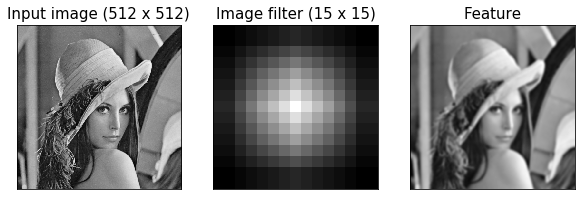

In [5]:
# Plot
fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(1, 3, 1)
ax1.imshow(input_image, 'gray')
ax1.set_title('Input image (512 x 512)', fontsize=15)
ax1.set_xticks([])
ax1.set_yticks([])

ax2 = fig.add_subplot(1, 3, 2)
ax2.imshow(image_filter, 'gray')
ax2.set_title('Image filter (15 x 15)', fontsize=15)
ax2.set_xticks([])
ax2.set_yticks([])

ax3 = fig.add_subplot(1, 3, 3)
ax3.imshow(feature, 'gray')
ax3.set_title('Feature', fontsize=15)
ax3.set_xticks([])
ax3.set_yticks([])
plt.show()

# 2. Convolutional Neural Networks (CNN)

__Convolutional Networks__ 
- Simply neural networks that use the convolution in place of general matrix multiplication in at least one of their layers
- The convolution can be interpreted as a matrix multiplication

<br>
<table style="border-style: hidden; border-collapse: collapse;" width = "96%"> 
    <tr style="border-style: hidden; border-collapse: collapse;">
        <td width = 48% style="border-style: hidden; border-collapse: collapse;">
<img src="./image_files/conv.png" width = 400>
        </td>
        <td width = 48%>
<img src="./image_files/cnn_conv_1.png" width = 400>
        </td>
    </tr>
</table>

## 2.1. Convolutional Operator


__Matrix multiplication__
- Every output unit interacts with every interacts unit

<img src="./image_files/M_multiplication.png" width = 400>

**Convolution**

- Local connectivity
- Weight sharing
- Typically have sparse interactions

<img src="./image_files/conv_connect.png" width = 400>


## 2.2. Nonlinear Activation Function

<img src="./image_files/ReLU.png" width = 500>

## 2.3. Pooling
- Compute a maximum value in a sliding window (max pooling)


- Pooling size : $2\times2$


<img src="./image_files/Max_pooling_image.png" width = 500>


- Max pooling introduces invariances
     
<img src="./image_files/max_pool.PNG" width = 450>    

## 2.4. Inside the Convolution Layer

- First, the layer performs several convolutions to produce a set of linear activations
- Second, each linear activation is running through a nonlinear activation function
- Third, use pooling to modify the output of the layer further
    
<img src="./image_files/conv_layer.PNG", width = 250>

# 3. CNN with TensorFlow

- MNIST example 
- To classify handwritten digits

<br>
<img src="./image_files/CNN_arch.png" width = 850>
<br>

In [6]:
%%html
<center><iframe src="https://www.youtube.com/embed/z6k_RMKExlQ?start=5150&end=6132" 
width="560" height="315" frameborder="0" allowfullscreen></iframe></center>

## 3.1. Import Library

In [7]:
# Import Library
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## 3.2. Load MNIST Data

- Download MNIST data from the tensorflow tutorial example

In [8]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


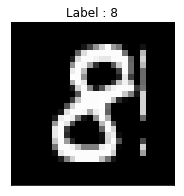

In [9]:
# Check data
train_x, train_y = mnist.train.next_batch(10)
img = train_x[9,:].reshape(28, 28)

plt.figure(figsize=(5, 3))
plt.imshow(img,'gray')
plt.title("Label : {}".format(np.argmax(train_y[9])))
plt.xticks([])
plt.yticks([])
plt.show()

## 3.3. Build a Model
__Convolution layers__
- First, the layer performs several convolutions to produce a set of linear activations
- Second, each linear activation is running through a nonlinear activation function
- Third, use pooling to modify the output of the layer further

__Fully connected layers__
- Simple multi-layer perceptrons

<br>
<img src="./image_files/CNN_arch.png" width = 850>
<br>

__First, the layer performs several convolutions to produce a set of linear activations__

<img src="./image_files/conv_animation.gif" width = 350>

- Filter size : $3\times3$
- Stride : The stride of the sliding window for each dimension of input
- Padding : Allow us to control the kernel width and the size of the output independently
    - `'SAME'` : zero padding
    - `'VALID'` : No padding

```python
conv1 = tf.nn.conv2d(x, weights['conv1'], strides= [1,1,1,1], padding = 'SAME')
```

- The number of channels: 2
<img src="./image_files/cnn_conv_1.png" width = 400>
<br>

__Second, each linear activation is running through a nonlinear activation function__

<img src="./image_files/ReLU.png" width = 500>

```python
conv1 = tf.nn.relu(tf.add(conv1, biases['conv1']))
```

__Third, use a pooling to modify the output of the layer further__
- Compute a maximum value in a sliding window (max pooling)

<img src="./image_files/Max_pooling_image.png" width = 500>
- Pooling size : $2\times2$

- Max pooling introduces invariances
     
<img src="./image_files/max_pool.PNG" width = 450>    

```python
maxp1 = tf.nn.max_pool(conv1, 
                       ksize = [1, p1_h, p1_w, 1], 
                       strides = [1, p1_h, p1_w, 1], 
                       padding ='VALID')
```

__Fully connected layer__
- Input is typically in a form of flattened features

<img src="./image_files/classification.png" width = 450>

```python
output = tf.add(tf.matmul(hidden1, weights['output']), biases['output'])
```

## 3.4. Define a CNN's Shape

In [10]:
input_h = 28 # Input height
input_w = 28 # Input width
input_ch = 1 # Input channel : Gray scale
# (None, 28, 28, 1)

## First convolution layer
# Filter size
k1_h = 3
k1_w = 3
# the number of channels
k1_ch = 32
# Pooling size
p1_h = 2
p1_w = 2
# (None, 14, 14 ,32)

## Second convolution layer
# Filter size
k2_h = 3
k2_w = 3
# the number of channels
k2_ch = 64
# Pooling size
p2_h = 2
p2_w = 2
# (None, 7, 7 ,64)

## Fully connected
# Flatten the features
# -> (None, 7*7*64)
conv_result_size = int((28/(2*2)) * (28/(2*2)) * k2_ch)
n_hidden1 = 100
n_output = 10

## 3.5. Define Weights, Biases and Network
- Define parameters based on predefined layer size
- Initialize with normal distribution with $\mu = 0$ and $\sigma = 0.1$

In [11]:
weights = {
    'conv1' : tf.Variable(tf.random_normal([k1_h, k1_w, input_ch, k1_ch],stddev = 0.1)),
    'conv2' : tf.Variable(tf.random_normal([k2_h, k2_w, k1_ch, k2_ch],stddev = 0.1)),
    'hidden1' : tf.Variable(tf.random_normal([conv_result_size, n_hidden1], stddev = 0.1)),
    'output' : tf.Variable(tf.random_normal([n_hidden1, n_output], stddev = 0.1))
}

biases = {
    'conv1' : tf.Variable(tf.random_normal([k1_ch], stddev = 0.1)),
    'conv2' : tf.Variable(tf.random_normal([k2_ch], stddev = 0.1)),
    'hidden1' : tf.Variable(tf.random_normal([n_hidden1], stddev = 0.1)),
    'output' : tf.Variable(tf.random_normal([n_output], stddev = 0.1))
}

x = tf.placeholder(tf.float32, [None, input_h, input_w, input_ch])
y = tf.placeholder(tf.float32, [None, n_output])

In [12]:
# Define Network
def net(x, weights, biases):
    ## First convolution layer
    conv1 = tf.nn.conv2d(x, weights['conv1'], 
                         strides= [1, 1, 1, 1], 
                         padding = 'SAME')
    conv1 = tf.nn.relu(tf.add(conv1, biases['conv1']))
    maxp1 = tf.nn.max_pool(conv1, 
                           ksize = [1, p1_h, p1_w, 1], 
                           strides = [1, p1_h, p1_w, 1], 
                           padding = 'VALID'
                           )
    
    ## Second convolution layer
    conv2 = tf.nn.conv2d(maxp1, weights['conv2'], 
                         strides= [1, 1, 1, 1], 
                         padding = 'SAME')
    conv2 = tf.nn.relu(tf.add(conv2, biases['conv2']))
    maxp2 = tf.nn.max_pool(conv2, 
                           ksize = [1, p2_h, p2_w, 1], 
                           strides = [1, p2_h, p2_w, 1], 
                           padding = 'VALID')

    # shape = conv2.get_shape().as_list()
    # maxp2_re = tf.reshape(conv2, [-1, shape[1]*shape[2]*shape[3]])
    maxp2_re = tf.reshape(maxp2, [-1, conv_result_size])
    
    ### Fully connected
    hidden1 = tf.add(tf.matmul(maxp2_re, weights['hidden1']), biases['hidden1'])
    hidden1 = tf.nn.relu(hidden1)
    output = tf.add(tf.matmul(hidden1, weights['output']), biases['output'])
    return output

## 3.6. Define Loss, Initializer and Optimizer

__Loss__
- Classification: Cross entropy
    - Equivalent to apply logistic regression
$$ -\frac{1}{N}\sum_{i=1}^{N}y^{(i)}\log(h_{\theta}\left(x^{(i)}\right)) + (1-y^{(i)})\log(1-h_{\theta}\left(x^{(i)}\right)) $$

__Initializer__
- Initialize all the empty variables
    
__Optimizer__
- GradientDescentOptimizer
- AdamOptimizer: the most popular optimizer
 

In [13]:
LR = 0.0001

pred = net(x, weights, biases)
loss = tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=pred)
loss = tf.reduce_mean(loss)

# optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
optm = tf.train.AdamOptimizer(LR).minimize(loss)

init = tf.global_variables_initializer()

## 3.7. Summary of Model 

<br>
<img src="./image_files/cnn_summary of model.png" width = 500>
<br>

## 3.8. Define Configuration
- Define parameters for training CNN
     - `n_batch` : batch size for stochastic gradient descent
     - `n_iter` : the number of training steps
     - `n_prt` : check loss for every `n_prt` iteration

In [14]:
n_batch = 50
n_iter = 2500
n_prt = 250

## 3.9. Optimization

In [15]:
# Run initialize
# config = tf.ConfigProto(allow_soft_placement=True)  # GPU Allocating policy
# sess = tf.Session(config=config)
sess = tf.Session()
sess.run(init)

# Training cycle
for epoch in range(n_iter):
    train_x, train_y = mnist.train.next_batch(n_batch)
    train_x = np.reshape(train_x, [-1, input_h, input_w, input_ch])
    sess.run(optm, feed_dict={x: train_x,  y: train_y})
    
    if epoch % n_prt == 0:
        c = sess.run(loss, feed_dict={x: train_x, y: train_y})
        print ("Iter : {}".format(epoch))
        print ("Cost : {}".format(c))

Iter : 0
Cost : 2.4444782733917236
Iter : 250
Cost : 0.8332914113998413
Iter : 500
Cost : 0.3245970904827118
Iter : 750
Cost : 0.31694334745407104
Iter : 1000
Cost : 0.18161849677562714
Iter : 1250
Cost : 0.396183580160141
Iter : 1500
Cost : 0.23486380279064178
Iter : 1750
Cost : 0.23770183324813843
Iter : 2000
Cost : 0.10626211017370224
Iter : 2250
Cost : 0.11698855459690094


## 3.10. Test

In [16]:
test_x, test_y = mnist.test.next_batch(100)

my_pred = sess.run(pred, feed_dict={x : test_x.reshape(-1, 28, 28, 1)})
my_pred = np.argmax(my_pred, axis=1)

labels = np.argmax(test_y, axis=1)

accr = np.mean(np.equal(my_pred, labels))
print("Accuracy : {}%".format(accr*100))

Accuracy : 98.0%


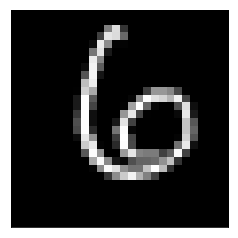

Prediction : 6
Probability : [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]


In [17]:
test_x, test_y = mnist.test.next_batch(1)
logits = sess.run(tf.nn.softmax(pred), feed_dict={x : test_x.reshape(-1, 28, 28, 1)})
predict = np.argmax(logits)

plt.imshow(test_x.reshape(28, 28), 'gray')
plt.xticks([])
plt.yticks([])
plt.show()

print('Prediction : {}'.format(predict))
np.set_printoptions(precision=2, suppress=True)
print('Probability : {}'.format(logits.ravel()))

# 4. Deep Learning of Things

- CNN implemented in an Embedded System

In [1]:
%%html
<center><iframe src="https://www.youtube.com/embed/baPLXhjslL8" 
width="560" height="315" frameborder="0" allowfullscreen></iframe></center>

In [2]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>